In [15]:
# Across-Fjord Properties Gif
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import gsw
import cmocean


In [2]:
# Read variables from dataset
def AF_prof(datapath, case_id, time, xidx):
    
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    state = State.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))
    Grid = xr.open_dataset(datapath + '/grid_' + str(format(case_id,'03d')) + '.nc') 
    grid = Grid.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))

    # Along-fjord velocity
    u0 = (state.U.data[:, :, :, 1:] + state.U.data[:, :, :, :-1]) / 2
    Uzy = u0[time,:,:,xidx]
    
    # Potential temp
    Tzy = state.Temp.data[time,:,:,xidx] # Temp in z, t dimensions
    
    depth = state.Z.data
    dist = state.Y.data - 25500         
    
    # Pressure and Density
    pres = gsw.p_from_z(depth, 55)
    Szy = state.S.data[time,:,:,xidx]
    p = np.tile(pres,[len(dist),1]).T
    RhoA = gsw.rho(Szy, Tzy, p) - 1000
               
    return depth, dist, Uzy, RhoA, Tzy

In [3]:
# Run some tests
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs'
path2 = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
path3 = '/work/oceans/wbao/MITgcm_results/iceplume/1_BaseCase'
#depth, dist, U1, Rho1 = AF_prof(path3, 1, -1, 178)
#state = xr.open_dataset(path3 + '/state_' + str(format(6,'03d')) + '.nc') 
#U = state.U.data
#V = state.V.data

In [ ]:
#U1.shape, Rho1.shape
U.max(), U.min(), V.max(), V.min()

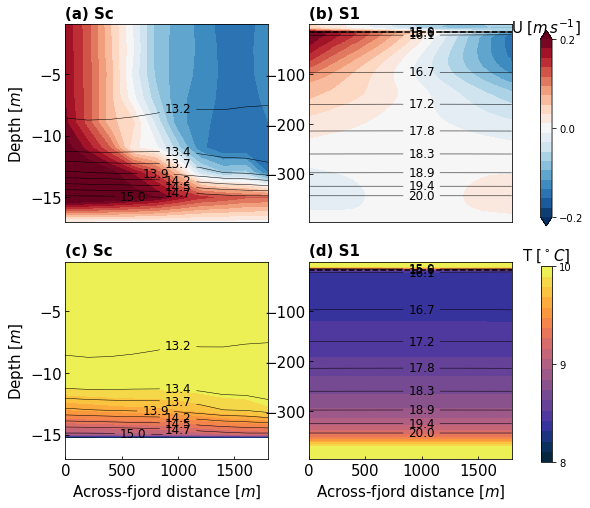

In [53]:
# Making plot
caseN = 1
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"


cu = np.linspace(-0.2,0.2,20) # Contour range for U
ct = np.linspace(8,10,20) # Contour range for Temp
crho1 = np.linspace(10,15,20) # Contour range for density
crho2 = np.linspace(15,20,10)
cmap1 = 'RdBu_r'
cmap2 = cmocean.cm.thermal

for t in range(120,121):
    fig1 = plt.figure(figsize=(8,8))
    fig1.tight_layout()
    
    depth, dist, U1, Rho1, T1 = AF_prof(path2, caseN, t, sc)
    depth, dist, U2, Rho2, T2 = AF_prof(path2, caseN, t, sw)
    
    # Plot along-fjord velocity
    ax1 = fig1.add_subplot(221)
    im1 = ax1.contourf(dist, depth, U1, cu, cmap=cmap1, extend='both')
    #ax1.axhline(y=depth[8],color='k',linestyle='--')

    # Plot isopycnals
    CS1 = ax1.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    plt.clabel(CS1, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes1 = fig1.add_axes([0.95, 0.53, 0.02, 0.34])
    cbar1 = fig1.colorbar(im1,cax=cbaxes1, orientation='vertical')
    cbar1.set_ticks([-0.2,0,0.2])
    cbar1.ax.set_title('U [$m\,s^{-1}$]', size=15)

    ax1.set_xlim(dist[0],dist[-1])
    ax1.set_ylim(depth[8],depth[0])
    ax1.xaxis.set_visible(False)
    ax1.tick_params(direction='in', labelsize=15)
    ax1.set_title('(a) Sc', loc='left', size=15, weight='bold')
    ax1.set_xlabel('Distance [$m$]', size=15)
    ax1.set_ylabel('Depth [$m$]', size=15)



    ax2 = fig1.add_subplot(222)
    im2 = ax2.contourf(dist, depth, U2, cu, cmap=cmap1, extend='both')
    ax2.axhline(y=depth[8],color='k',linestyle='--')
    CS2 = ax2.contour(dist, depth, Rho2, crho2, colors='k', linewidths=.5)
    plt.clabel(CS2, fmt='%1.1f', fontsize=12, inline=1)

    ax2.set_xlim(dist[0],dist[-1])
    ax2.set_ylim(depth[-1],depth[0])
    ax2.xaxis.set_visible(False)
    ax2.tick_params(direction='in', labelsize=15)
    ax2.set_title('(b) S1', loc='left', size=15, weight='bold')
    ax2.set_xlabel('Distance [$m$]', size=15)
    
    # Plot temperature
    ax3 = fig1.add_subplot(223)
    im3 = ax3.contourf(dist, depth, T1, ct, cmap=cmap2)
    CS3 = ax3.contour(dist, depth[:8], Rho1[:8,:], crho1, colors='k', linewidths=.5)
    plt.clabel(CS3, fmt='%1.1f', fontsize=12, inline=1)

    cbaxes2 = fig1.add_axes([0.95, 0.12, 0.02, 0.34])
    cbar2 = fig1.colorbar(im3,cax=cbaxes2, orientation='vertical')
    cbar2.set_ticks([8,9,10])
    cbar2.ax.set_title('T [$^\circ C$]', size=15)
    
    ax3.set_xlim(dist[0],dist[-1])
    ax3.set_ylim(depth[8],depth[0])
    ax3.tick_params(direction='in', labelsize=15)
    ax3.set_title('(c) Sc', loc='left', size=15, weight='bold')
    ax3.set_ylabel('Depth [$m$]', size=15)
    ax3.set_xlabel('Across-fjord distance [$m$]', size=15)

    
    
    ax4 = fig1.add_subplot(224)
    im4 = ax4.contourf(dist, depth, T2, ct, cmap=cmap2)
    ax4.axhline(y=depth[8],color='k',linestyle='--')
    CS4 = ax4.contour(dist, depth, Rho2, crho2, colors='k', linewidths=.5)
    plt.clabel(CS4, fmt='%1.1f', fontsize=12, inline=1)

    ax4.set_xlim(dist[0],dist[-1])
    ax4.set_ylim(depth[-1],depth[0])
    ax4.tick_params(direction='in', labelsize=15)
    ax4.set_title('(d) S1', loc='left', size=15, weight='bold')
    ax4.set_xlabel('Across-fjord distance [$m$]', size=15)

    #plt.close()
    #fig1.savefig(fig_path + '/time_r' + format(t, '03d') + '.png', dpi=200, bbox_inches='tight')
    fig1.savefig(fig_path + '/4Sz_AF-UT_day60.png', dpi=300, bbox_inches='tight')

In [ ]:
# Generate GIF from saved output figures
import imageio
import glob

images = []
imagenames = sorted(glob.glob(fig_path + '/time_r*.png'))

for filename in imagenames:
    images.append(imageio.imread(filename))
imageio.mimsave(fig_path + 'Pta018_24-48.gif', images, duration=.6)